# <span style='color: purple'>2 머신러닝 프로젝트</span>

In [11]:
# 2-2 총14분 Airbnb (New York City) 리스트로 가격라는 feature를 예측 E2-2 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
# 6-3 EDA-groupby연산으로 eda진행하기. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습. 

In [12]:
import pandas as pd # 2-2 1:50 baseline 라이브러리 

train = pd.read_csv('/aiffel/data/train.csv') # data set 불려오기
test = pd.read_csv('/aiffel/data/test.csv')

In [13]:
# EDA (exploranary? data analysis )

train.shape, test.shape # 데이터 크기, 실행보니 train data 39116개, test data 9779개) , train data가 feature수가 1개 더 있다. 타겟값이 1개 더

((39116, 16), (9779, 15))

In [14]:
# 데이터 샘플 확인, Latitude 위도, * test data 엔 가격X
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [15]:
train.info() # 데이터 타입 float64(3), int64(7), object(6) 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [16]:
train.isnull().sum() # 결측치(test)있나? 확인  데이터에 값이 없는 것  -name에 12개 ---

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
test.isnull().sum()  

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

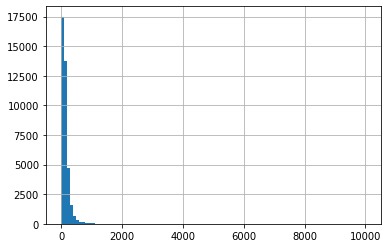

In [18]:
 train['price'].hist(bins=100) # target인 가격을 hist맵으로 train['price'].hist(bins=100)  

In [19]:
train['price'].describe() # 숙박비에 눈엔 안보이는 10000도 있다는등 더 자세히 보려면 describe.최대1만, 75%까지만 봐도 175밖에 없는데

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
# 4분 위 결측치 보면 host ID가 중복이 있는지 value_counts 확인.가장 많은 중복이 있는게 256개, 젤 적은거 한개 
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [21]:
# 4:30 데이터 전처리 :데이터를 살펴보고 판단하여 결측치 및 이상치를 처리. last_review, reviews_per_month 에 결측치 있다.

In [22]:
# 결측치 last_review 는 날짜형태라 채울수없어 컬럼 삭제,  'reviews_per_month'는 0으로 채움  
train = train.drop('last_review', axis=1)  #첫열인데 0이 아니고 1이라 ..... 
test = test.drop('last_review', axis=1)   #   l 소문자

In [23]:
# 결측치 채우기 'reviews_per_month'는 0으로 채움  
train['reviews_per_month'] = train['reviews_per_month'].fillna(0) 
test['reviews_per_month'] = test['reviews_per_month'].fillna(0) 

In [24]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0.00,1,0


In [25]:
train.isnull().sum() # 결측치 삭제할거하고 채울거 채워 확인 ** 5:20 결측치 적은 'name';host name'은 머신런닝에서 안쓸거라  넘어감. 

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [26]:
# target에 옮겨놓고 data train에는 삭제
target = train['price'] 
train = train.drop('price', axis=1) 

In [27]:
# 6분 전처리를 심플하게하기위해 수치형 피처 선택.수치형  data들만 cols에 담고 train, test 동일하게 적용Qint64인 id, prices안담는건 가격영향주는것만?

cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

In [28]:
# 검증 데이터 분리- 약 20% 정도 검증데이터로 분리. Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측
# X_train에 31292개 X_validation에 7824개 담았다

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

In [29]:
# 6:35 회귀모델들 하나씩 심플하게 적용, 1.머신런닝=선형회귀 회귀 29-1에, 2. 릿지회귀, 3. 라쏘, 4. 엘라스틴, 5.렌덤포레스트, 6. Xgboost 다 31000~33000사이
# 우리가 예측할 데이터는 test데이터, 위 6가지 회귀가 아니라.* 6가지 코딩 줄단위로 왜 그리썼는지는 설명x
# 머신러닝=선형회귀 회귀 보통 feature가 두 개 이상인 다중 선형회귀를 만들게 됩. 선형회귀는 알려진 다른 관련 데이터 값을 사용하여 알수 없는 데이터의 값을 예측하는 데이터 분석 기법
# 머신러닝(회귀) Q 이게 뭔지 OKR에도 없었고 노드에 있는지 찾아볼 겨를x,  Q 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

32000.4623726053

In [30]:
# 릿지 회귀 :오버피팅 문제로 규제(regularization)를 적용한 모델,파라미터(alpha) 값을 활용해 조절,alpha 값이 커질수록 회귀 계수 값을 작게 만듬.규제(regularization) : 오버피팅 방지하기위함,

from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32002.921365825365

In [31]:
# coef 회귀계수 29-3 2:10 'alpha1' 대신 내가 설정한 '회귀계수' 넣으니 에러. 넣어보고 에러나는지 보는방법뿐.

In [32]:
# 29-3 3분 위실행에서 나온 Array 값들의 순서는 feature들, 어떤게 어떤 회귀계수인지 알려고 df로 만듬.  

coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
host_id,2.368097e-08
latitude,2.083514e+02
longitude,-7.948728e+02
minimum_nights,1.120975e-01
number_of_reviews,-2.332537e-01
reviews_per_month,-3.574521e+00
calculated_host_listings_count,6.688200e-02
availability_365,1.924192e-01


In [33]:
# 릿지 회귀 ('회귀계수'=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.52161e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32045.78942400753

In [34]:
# 회귀 계수 (회귀계수20)
coef['alpha20'] = model.coef_
coef

,alpha1,alpha20
host_id,2.368097e-08,1.745285e-08
latitude,2.083514e+02,1.836513e+02
longitude,-7.948728e+02,-6.952352e+02
minimum_nights,1.120975e-01,1.225140e-01
number_of_reviews,-2.332537e-01,-2.322022e-01
reviews_per_month,-3.574521e+00,-3.864813e+00
calculated_host_listings_count,6.688200e-02,8.756983e-02
availability_365,1.924192e-01,1.892535e-01


In [35]:
# 릿지 회귀 (회귀계수=0.01) Q 회귀계수 10, 20이 동일,  0.05 0,01이 수치 같은데 코딩 잘못된게 없는데 ....
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.01777e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


32000.483824202598

In [36]:
coef['alpha0.01'] = model.coef_
coef

,alpha1,alpha20,alpha0.01
host_id,2.368097e-08,1.745285e-08,2.447688e-08
latitude,2.083514e+02,1.836513e+02,2.114880e+02
longitude,-7.948728e+02,-6.952352e+02,-8.076024e+02
minimum_nights,1.120975e-01,1.225140e-01,1.107680e-01
number_of_reviews,-2.332537e-01,-2.322022e-01,-2.333882e-01
reviews_per_month,-3.574521e+00,-3.864813e+00,-3.537426e+00
calculated_host_listings_count,6.688200e-02,8.756983e-02,6.423957e-02
availability_365,1.924192e-01,1.892535e-01,1.928235e-01


In [37]:
# 엘라스틱넷Elastic Net 회귀 : L2 규제와 L1 규제를 결합한 회귀. 
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

33521.06875602843

In [39]:
# 랜덤포레스트 Bagging 방식을 사용하는 대표적인 알고리즘.  Bootstrap aggregating방식 : 병렬로, 복원추출? 로 부트스트랩을 집계. 복원추출-측정된 데이터 중에서 중복을 허용한 복원 추출로 n개를 뽑고, 뽑은 n개의 평균을 구하는 것을 m번 반복하여 모으게 되면 평균에 대한 분포를 구할 수 있게 되고, 이로부터 sample mean에 대한 신뢰 구간을 추정
from sklearn.ensemble import RandomForestRegressor  # 이걸로 조절하면 가장 낮게 나옴

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

31446.66249631902

In [40]:
#Xgboost # 출처 : Aiffel LMS 2-2 머신러닝

from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


31838.531510528188

In [45]:
# 하이퍼파라미터
from sklearn.model_selection import RandomizedSearchCV

params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [46]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

#  Randomized Search
model = XGBRegressor()
grid = RandomizedSearchCV(model, params, cv=3, n_iter=5, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

## <span style='color: purple'>해당 코드들을 따와서 어떤걸 바꾸고 어떤걸 그대로 놔둬야 하는지 구분하기 힘들어 에러 바로잡는데 상당히 시간이 소모되었다 </span>

In [47]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.07}

In [48]:
# 최적의 하이퍼파라미터 적용 
model = XGBRegressor(random_state=2022, 
                      max_depth = 7,
                      learning_rate = 0.07,
                      n_estimators = 200,
                      subsample = 0.7   
                     )
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

30665.430953518433

In [49]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

47867.688138996615

### <span style='color:purple'>회고 : OKR 하기 급급했는데 프로젝트를 하려니 막막~  </span> 
### <span style='color:purple'>복습을 해봐야  프로젝트 어떻게 할지 방향을 잡을수 있을것 같았음. </span> 
### <span style='color:purple'>project 하는동안이 그나마 찬찬히 들여다 보니 OKR 했던게 이제서야 조각모음이 조금씩 되는 느낌.</span> 